In [1]:
%load_ext autoreload
%autoreload 2

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from flair.embeddings import FlairEmbeddings, WordEmbeddings, DocumentPoolEmbeddings, TransformerDocumentEmbeddings
from flair.data import Sentence
from flair.models import TextClassifier
from sklearn.decomposition import PCA
import seaborn as sns
from tqdm.auto import tqdm

In [59]:
from hach.data import get_climate_data
from hach.cleaning import clean_df

In [4]:
full_df, dfs = get_climate_data()

In [60]:
df_2017 = clean_df(dfs[2017]).copy()

In [193]:
bert = TransformerDocumentEmbeddings('bert-base-cased')

In [179]:
# 
embedding = WordEmbeddings('en-news')
document_embeddings = DocumentPoolEmbeddings([embedding])
classifier = TextClassifier.load('en-sentiment')

2021-12-03 11:44:54,114 loading file /home/jupyter-hugo/.flair/models/sentiment-en-mix-distillbert_4.pt


In [180]:
embeddings = []
sentiments = []
for quote in tqdm(df_2017.quotation):
    sent = Sentence(quote)
    document_embeddings.embed(sent)
    embeddings.append(sent.embedding.numpy())

  0%|          | 0/49268 [00:00<?, ?it/s]

In [194]:
sent = Sentence("Climate change is not real and this is a real long sentence. I'm gonna make america better.")

In [200]:
sent = Sentence("We need to tackle climate change")

In [204]:
bert.embed(sent)

[Sentence: "We need to tackle climate change"   [− Tokens: 6]]

In [202]:
sent.embedding

tensor([ 2.5593e-01, -1.8780e-01, -2.9697e-01, -4.4008e-01, -3.2363e-01,
        -1.9858e-01,  4.4189e-01, -1.6283e-01,  3.3480e-01, -1.0178e+00,
        -4.0047e-02, -6.1135e-03, -5.7800e-02, -1.6459e-02, -4.7255e-01,
        -8.8425e-02,  2.3958e-01,  4.2170e-02, -2.2869e-01, -3.7024e-01,
         1.2563e-01, -6.9017e-02,  2.4468e-01, -3.9595e-01,  1.8258e-01,
        -1.2855e-01, -3.1863e-02, -6.3133e-02, -2.1569e-01,  1.4259e-02,
         2.6477e-01,  3.1110e-01, -2.6101e-01,  9.8781e-02, -2.5501e-01,
        -5.1392e-02, -1.3354e-02, -4.0659e-01,  6.3202e-02,  1.4574e-01,
        -3.3066e-01,  5.2055e-01,  7.4724e-01, -2.3321e-01,  3.2385e-01,
        -2.0917e-01, -2.1220e-01,  2.3709e-01, -3.7782e-01,  1.3360e-01,
         1.1473e-01,  2.1934e-01, -1.1285e-01,  2.2725e-02,  2.2836e-01,
         3.4597e-01, -1.5374e-01,  5.8256e-02, -6.7279e-01,  4.5261e-01,
         9.6335e-02, -2.3125e-01,  4.6530e-01,  2.7718e-01,  1.8758e-01,
         1.7966e-01, -8.0175e-03, -1.4166e-01, -5.9

In [163]:
classifier.predict(sent)
document_embeddings.embed(sent)
print(sent.labels)
print(sent.embedding.numpy())

[POSITIVE (0.883)]
[-0.0117     -0.09843334  0.0262     -0.154      -0.05664999  0.0582
 -0.21276666  0.09253333  0.13086665 -0.05003333 -0.03101667  0.14533333
 -0.10356667 -0.01455     0.02535    -0.06191667  0.10255001  0.01055
  0.04751667  0.01098333 -0.08934999  0.07645    -0.0143      0.02733333
 -0.1129     -0.02193333  0.02179999 -0.2033      0.09135001  0.06205
  0.02911667 -0.15066668  0.10981667 -0.03983334  0.0056     -0.13048334
 -0.2641     -0.04553333  0.08875     0.05386667 -0.08759999  0.27338332
  0.03013333 -0.11103333 -0.0565     -0.02601667 -0.06943334 -0.1013
  0.00188333  0.2805     -0.0576      0.10353333  0.15381666  0.0224
 -0.03456667  0.03865     0.01505    -0.21671666 -0.0949      0.00383334
  0.07848334  0.05188334 -0.10708333 -0.21735    -0.02028334  0.07676666
 -0.11413334  0.06266667 -0.0296      0.12990001  0.01721667  0.06726667
  0.0977      0.15916666 -0.07955001 -0.1122     -0.33784997 -0.1226
  0.31068334 -0.1169      0.4466     -0.10999999  0.07

In [181]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embeddings)

In [182]:
pca_control = pca.transform(sent.embedding.numpy().reshape(1, -1))

In [183]:
pca_control

array([[-0.26368257,  0.12890395]])

In [184]:
principalComponents

array([[-0.10666933,  0.00883991],
       [ 0.15761524,  0.07379045],
       [ 0.23542562,  0.00361286],
       ...,
       [ 0.10172401, -0.02054322],
       [-0.07583694, -0.03702399],
       [-0.26368254,  0.12890529]])

In [185]:
df_2017[['pca_1', 'pca_2']] = principalComponents

In [186]:
data = df_2017.groupby('speaker').agg({'numOccurrences': 'sum', 'pca_1': 'mean', 'pca_2': 'mean'})

In [187]:
data = data.sort_values('numOccurrences', ascending=False)[:100]

In [188]:
df = pd.merge(data, speakers_2017, how="left", on="speaker")

In [189]:
data.head()

,numOccurrences,pca_1,pca_2
speaker,,,
Donald Trump,9046,0.035908,0.026287
Scott Pruitt,3386,-0.006908,0.028098
Angela Merkel,3106,-0.008584,0.011113
António Guterres,2638,0.043186,0.005236
Jerry Brown,2620,-0.008250,0.023806


In [190]:
df = df_2017[df_2017.speaker.isin(["Donald Trump", "Angela Merkel"])]

<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

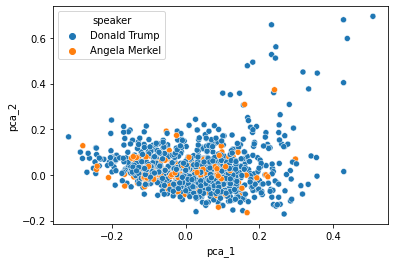

In [191]:
sns.scatterplot(x="pca_1", y="pca_2", data=df, hue=df.speaker)


In [54]:
speakers_2017 = pd.read_pickle('data/speakers_2017.pkl')

In [55]:
speakers_2017.head()

,speaker,quotation_count,gender,age,nationality,political_party,occupation
0,Donald Trump,910,male,75.0,United States of America,Republican Party,business magnate
1,Scott Pruitt,417,male,53.0,United States of America,Republican Party,lawyer
2,Al Gore,361,male,73.0,United States of America,Democratic Party,politician
3,Jerry Brown,344,male,83.0,United States of America,Democratic Party,lawyer
4,Catherine McKenna,255,female,50.0,Canada,Liberal Party of Canada,lawyer
